In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号


def read_file(file_name):
    df = pd.read_csv(file_name)
    X = np.array(df.iloc[0:, :4])
    labels_true = np.array(df['Species'])
    le = preprocessing.LabelEncoder()
    le.fit(labels_true)
    y = le.transform(labels_true)
    return X, y, labels_true


def number_to_label(label):
    label = ['versicolor' if value == 0 else value for value in label]
    label = ['setosa' if value == 1 else value for value in label]
    label = ['virginica' if value == 2 else value for value in label]
    return np.array(label)


def plot_data(*data):
    X, labels_true, title = data
    labels = np.unique(labels_true)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = 'rgbycm'
    for i, label in enumerate(labels):
        position = labels_true == label
        ax.scatter(X[position, 0], X[position, 1], alpha=.7, label=labels[i]),
        color = colors[i % len(colors)]

    ax.legend(loc="best", framealpha=0.5)
    ax.set_title(title)
    plt.show()


def plot3d_data(*data):
    X, labels_true, title = data
    labels = np.unique(labels_true)
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = 'rgbycm'
    for i, label in enumerate(labels):
        position = labels_true == label
        ax.scatter(X[position, 0],
                   X[position, 1],
                   X[position, 2],
                   alpha=.7,
                   label=labels[i]),
        color = colors[i % len(colors)]

    ax.legend(loc="best", framealpha=0.5)
    ax.set_title(title)
    plt.show()


def hierarchical_clustering(*data):
    X, labels_true = data
    clst = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
    predicted_labels = clst.fit_predict(X)
    print("ARI:{}".format(adjusted_rand_score(labels_true, predicted_labels)))
    return (predicted_labels)


def agglomerative_clustering_nclusters(*data):
    X, labels_true = data
    nums = range(1, 50)
    ARIS = []
    for num in nums:
        clst = cluster.AgglomerativeClustering(n_clusters=num)
        predicted_lables = clst.fit_predict(X)
        ARIS.append(adjusted_rand_score(labels_true, predicted_lables))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(nums, ARIS, marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    fig.suptitle("AgglomerativeClustering")
    plt.show()


def agglomerative_clustering_linkage(*data):
    X, labels_true = data
    nums = range(1, 50)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    linkages = ['ward', 'complete', 'average']
    markers = "+o*"
    for i, linkage in enumerate(linkages):
        ARIs = []
        for num in nums:
            clst = cluster.AgglomerativeClustering(n_clusters=num,
                                                   linkage=linkage)
            predicted_labels = clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label="linkage:%s" % linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()

In [2]:
X, y, labels = read_file('./data_set/iris.csv')
labels_predict = hierarchical_clustering(X, y)
score = silhouette_score(X, labels_predict, metric='cosine')
print("Silhouette Coefficient:{}".format(score))

ARI:0.7591987071071522
Silhouette Coefficient:0.5641894895595622


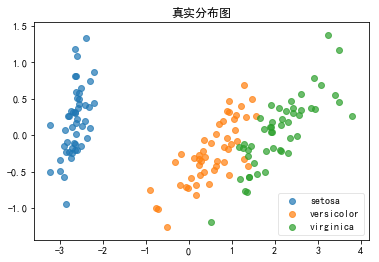

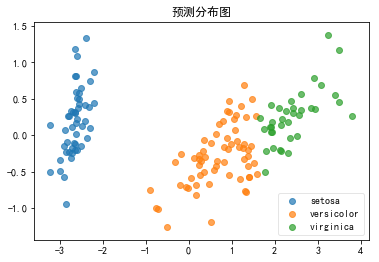

In [3]:
pca = PCA(n_components=2)  #实例化
pca = pca.fit(X)  #拟合模型
X_dr = pca.transform(X)  #获取新矩阵
plot_data(X_dr, labels, "真实分布图")
labels_predict = number_to_label(labels_predict)
plot_data(X_dr, labels_predict, "预测分布图")

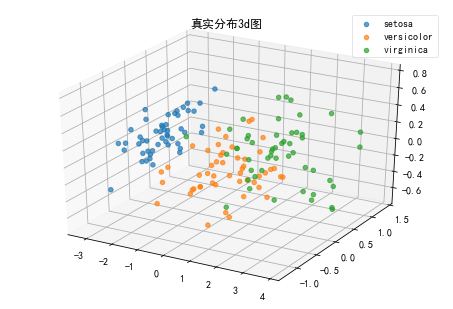

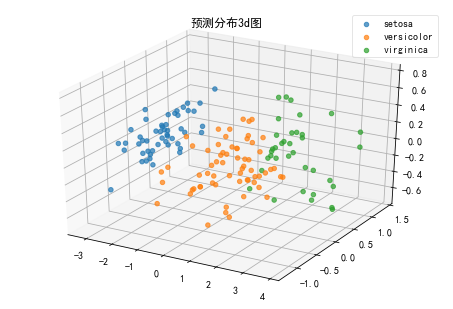

In [4]:
pca = PCA(n_components=3)  #实例化
pca = pca.fit(X)  #拟合模型
X_dr = pca.transform(X)  #获取新矩阵
plot3d_data(X_dr, labels, "真实分布3d图")
plot3d_data(X_dr, labels_predict, "预测分布3d图")

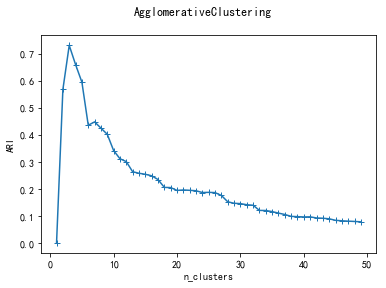

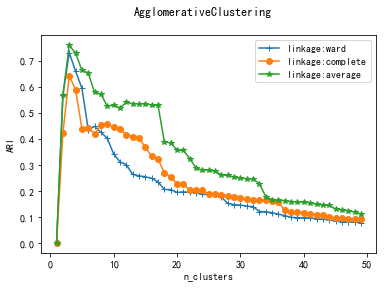

In [5]:
agglomerative_clustering_nclusters(X, y)
agglomerative_clustering_linkage(X, y)